In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from KMeans import KMeans

In [128]:
data=pd.read_csv('Iris Dataset.csv')

In [129]:
data.describe()#it describe the data stored in train like count,mean etc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,112.750000,5.843333,3.054000,3.758667,1.198667
std,48.299035,0.826680,0.432869,1.761467,0.761883
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,75.750000,5.100000,2.800000,1.600000,0.300000
50%,150.000000,5.800000,3.000000,4.350000,1.300000
75%,150.000000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             300 non-null    int64  
 1   SepalLengthCm  300 non-null    float64
 2   SepalWidthCm   300 non-null    float64
 3   PetalLengthCm  300 non-null    float64
 4   PetalWidthCm   300 non-null    float64
 5   Species        300 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 14.2+ KB


In [131]:
data.isnull().sum()#it will sum/count all the nan values present in train dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [132]:
data=data.drop(["Id"],axis=1) #As id does not help in clutering so we wil drop this coloumn

In [133]:
data.columns.values # it will print all columns name

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

In [134]:
data['Species'].unique() #this is to print all unique value in the column

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [135]:
Species_dict={"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2} # here  dictionry which is like map of cpp, is described 
data["Species"]=data["Species"].map(Species_dict) #Species coloumn values are mapped with dictionary and 'Iris-setosa'will be 0, 'Iris-versicolor'will be 1, 
                                                   #'Iris-virginica' will be 2
data.head()#it print the 1st five values of data stored in train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [136]:
result_check=data['Species'].values # this is storing the value of last column i.e. species

<Axes: >

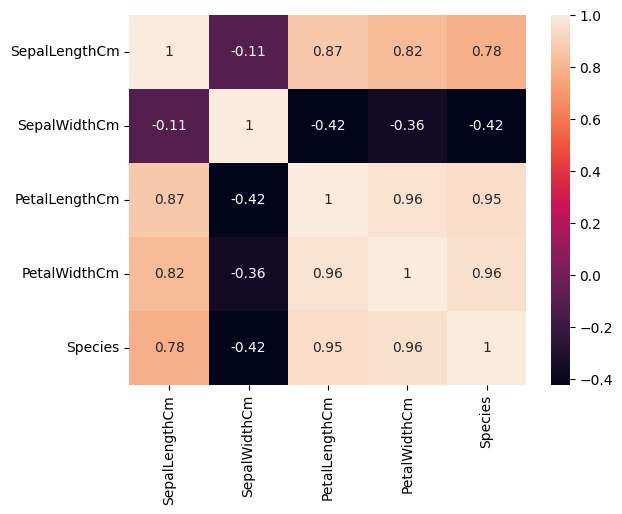

In [137]:
%matplotlib inline 
import seaborn as sns 
corr = data.corr()    
sns.heatmap(corr, annot=True) # this is to draw heatmap which is used to tell correlation among features and labels; basically it 
                              #gives info for e.g. which features for label has more weight or more important for the decision and 
                              # also we can remove unwanted/less affecting features  

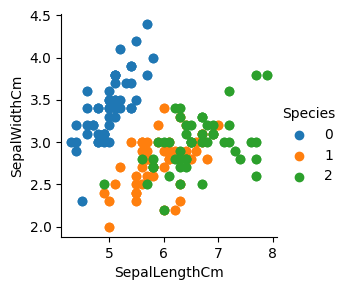

In [138]:
#This will mapp the data in which color will be according to species i.e. 3 differnt color and it will plot "SepalLengthCm", "SepalWidthCm"
sns.FacetGrid(data, hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

In [139]:
data.columns.values # it will print all columns name

array(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'], dtype=object)

In [140]:

#here we are storing the features in X variable and species or cluster value in y variable 

X=data.iloc[:,[0,1,2,3]].values
y=data.iloc[:,4].values
print(X.shape)


clusters = len(np.unique(y)) # here length of number of unique cluster is calculated  
print(clusters)

k = KMeans(K=clusters, max_iters=150, plot_steps=False) # here we called the Kmeans algo ,where no. of cluster =3 ,maximum iterations=150,plot steps is used if we want to plot the data at each step 
y_pred = k.predict(X) #here we called the prediction function in order to plot 




(300, 4)
3


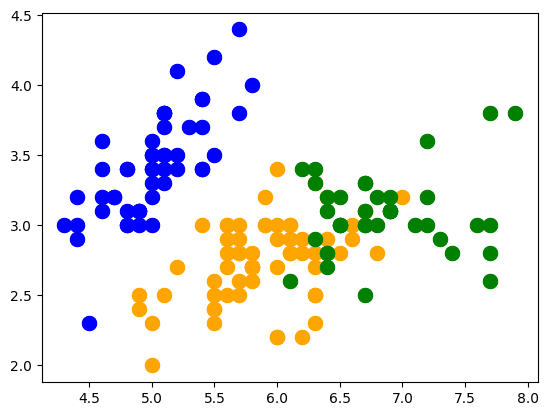

In [141]:
#here predicted values are plotted where each color shows different cluster
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = '0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'orange', label = '1')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = '2')





In [142]:

acc = np.sum(y_pred == result_check) / len(result_check) # here accuracy is calculated
print(acc)

0.8933333333333333


Shape of X: (300, 4)
Shape of transformed X: (300, 3)
X1 [-2.68420713 -2.71539062 -2.88981954 -2.7464372  -2.72859298 -2.27989736
 -2.82089068 -2.62648199 -2.88795857 -2.67384469 -2.50652679 -2.61314272
 -2.78743398 -3.22520045 -2.64354322 -2.38386932 -2.6225262  -2.64832273
 -2.19907796 -2.58734619 -2.3105317  -2.54323491 -3.21585769 -2.30312854
 -2.35617109 -2.50791723 -2.469056   -2.56239095 -2.63982127 -2.63284791
 -2.58846205 -2.41007734 -2.64763667 -2.59715948 -2.67384469 -2.86699985
 -2.62522846 -2.67384469 -2.98184266 -2.59032303 -2.77013891 -2.85221108
 -2.99829644 -2.4055141  -2.20883295 -2.71566519 -2.53757337 -2.8403213
 -2.54268576 -2.70391231  1.28479459  0.93241075  1.46406132  0.18096721
  1.08713449  0.64043675  1.09522371 -0.75146714  1.04329778 -0.01019007
 -0.5110862   0.51109806  0.26233576  0.98404455 -0.174864    0.92757294
  0.65959279  0.23454059  0.94236171  0.0432464   1.11624072  0.35678657
  1.29646885  0.92050265  0.71400821  0.89964086  1.33104142  1.5573

C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_3880\2691214596.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


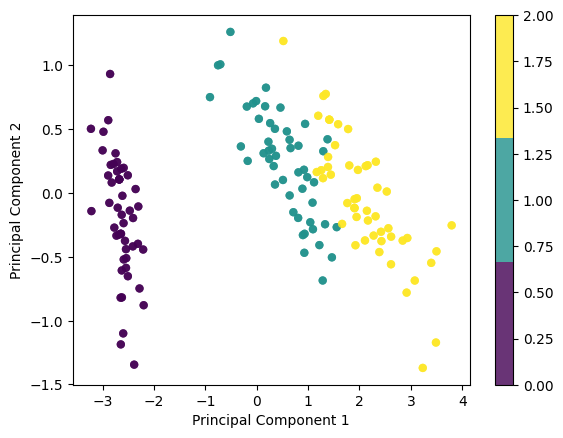

In [145]:
#from PCA import PCA
import numpy as np


class PCA:
    # fom here algorithm starts, it is like constructor in python.as a defalut parameer, self is passed as an argument is is like the object of the class
    # which is object variable used to initialize the data members ,
    def __init__(self, n_components):
        self.n_components = n_components #here number of components we need is stored
        self.components = None #this is for eigenvector, it is none in start
        self.mean = None #and we have taken mean as none

    def fit(self, X):
        # Mean centering
        # mean is subtracted from each component to remove the biased behaviour of component in the mean direction and to capture true variance
     
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance,it tells degree to which two variables vary toghether i.e. realtionship bewteen them is direct or inverse
        # this function needs samples to arranged as columns so transpose is there
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        #eigenvalues shows the importance of corresponding vector
        #eigenvector shows the direction of maximum variance(variance is spread of data)
        eigenvalues, eigenvectors = np.linalg.eig(cov)# so here calculation of  eigenvalues and eigenvector of covariance take place  

        # so we need eigenvectors to be aranged as columns so we take transpose
        eigenvectors = eigenvectors.T
        # now we need to sort in decreasing order, so we reversed the sorted list and got their indexes
        idxs = np.argsort(eigenvalues)[::-1] 
        #now we will arrange the eigenvector,eigenvalues wrt to indexes of sorted eigenvalues
        eigenvalues = eigenvalues[idxs] 
        eigenvectors = eigenvectors[idxs]

        # now we will store first n eigenvectors 
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        #  now we will project our data
        X = X - self.mean
        return np.dot(X, self.components.T) # here transpose is taken as we needto tsore it as coloumn and above we had already taken a transpose 2 times cancelling effect


    
pca = PCA(3) #here we called PCA algorithm here number of components we need is passes which is 3
pca.fit(X)# here we will call fit function inorder to fit the data
X_projected = pca.transform(X) # now transform function is called to project the data

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

#And now the data calculated/projected is now been plotted using scatter
x1 = X_projected[:, 0] 
x2 = X_projected[:, 1]
x3=X_projected[:,2]
print("X1",x1)
print("X2",x2)
print("X3",x3)

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

C:\Users\NIKITA_PC\AppData\Local\Temp\ipykernel_3880\4171037079.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x3, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


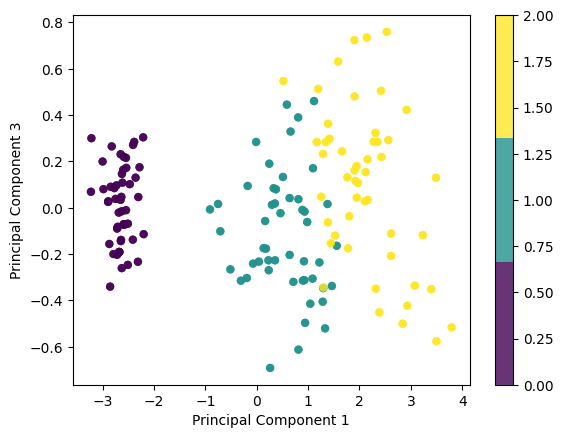

In [146]:
plt.scatter(
    x1, x3, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.colorbar()
plt.show()